In [1]:
from analyse import AnalyseCannon

In [2]:
model_unrestricted = AnalyseCannon("sfh_2000_10_20250904_134728", 10, restricted=False)
model_restricted = AnalyseCannon("sfh_2000_10_20250904_134728", 10, restricted=True)

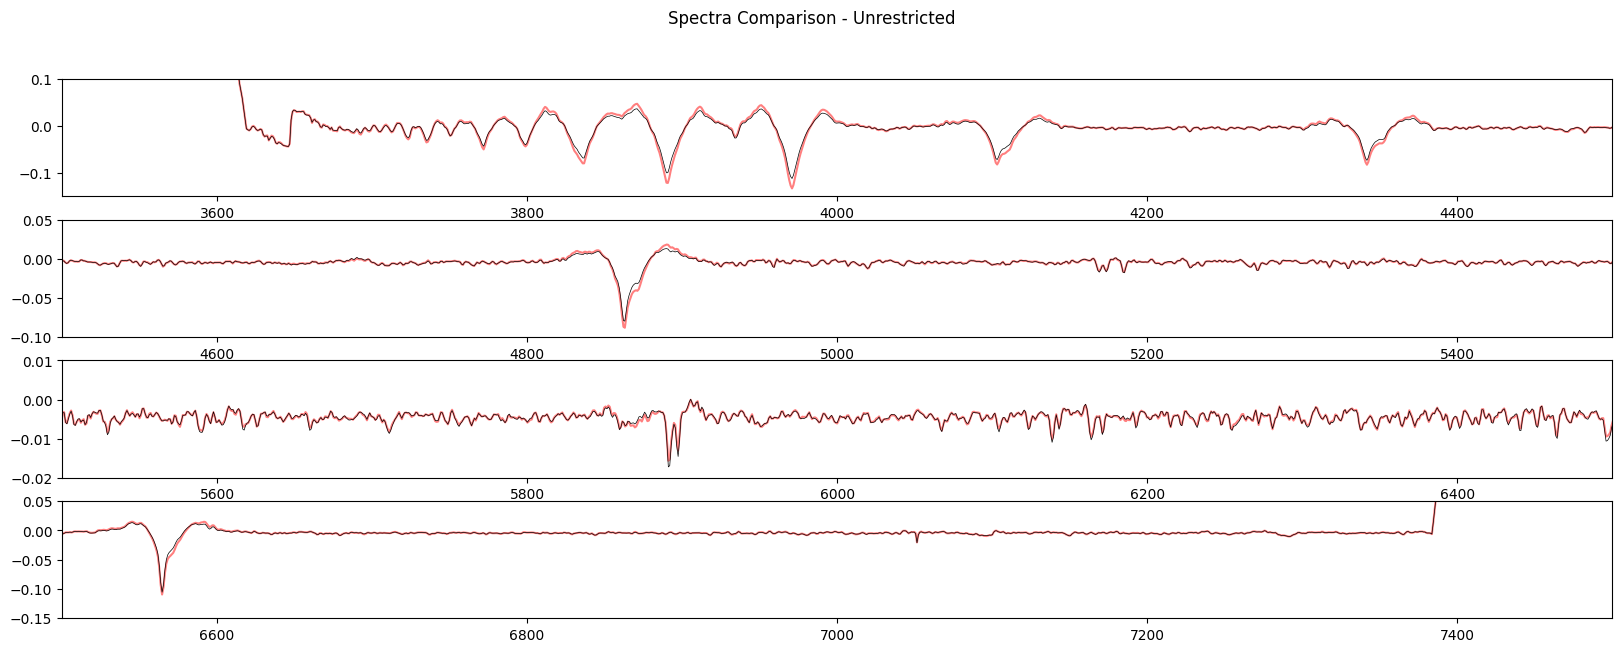

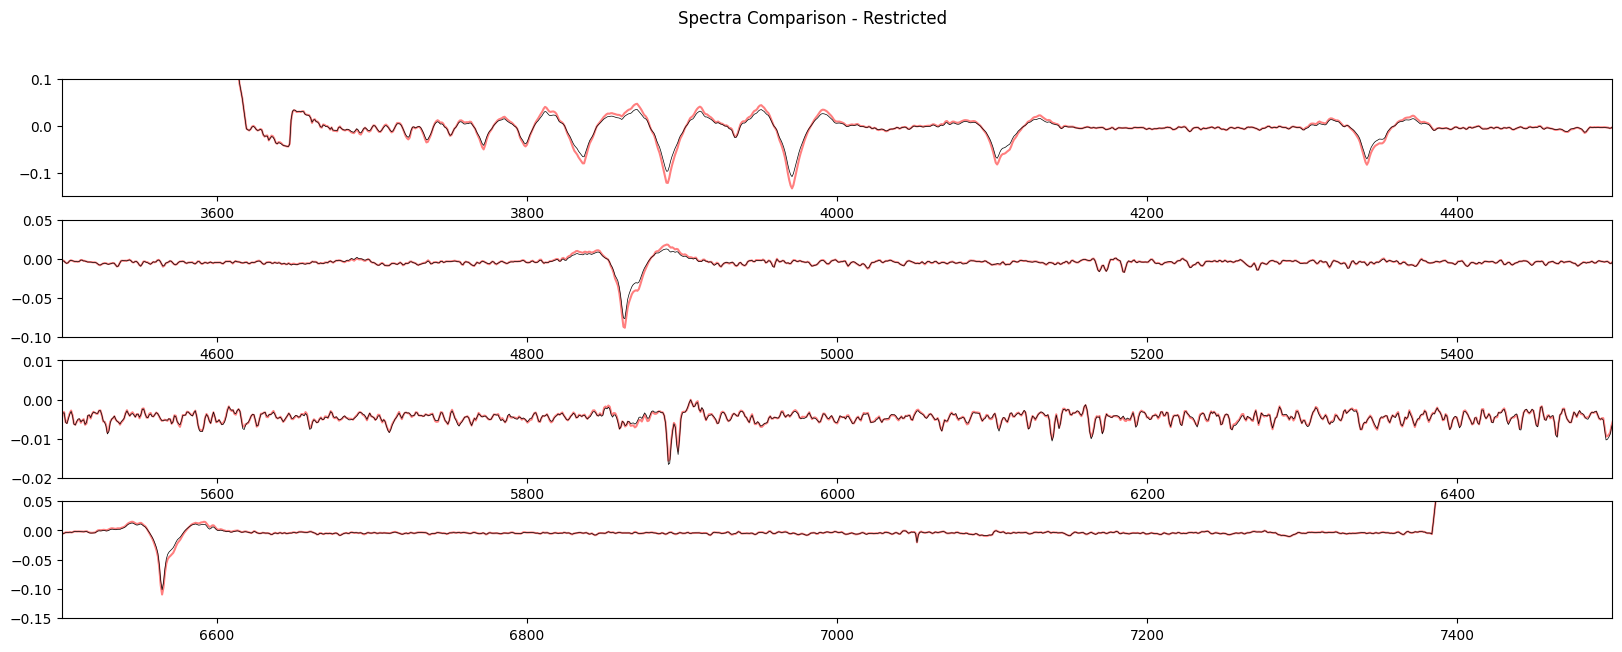

In [3]:
model_unrestricted.plot_spectra()
model_restricted.plot_spectra()

/home/vmehta/honours-project/analyse.py:83: RuntimeWarning: divide by zero encountered in log10
  binning = np.log10(bin_arr)
/home/vmehta/honours-project/analyse.py:85: RuntimeWarning: invalid value encountered in add
  self.bin_centers = binning[:-1] + bin_widths/2


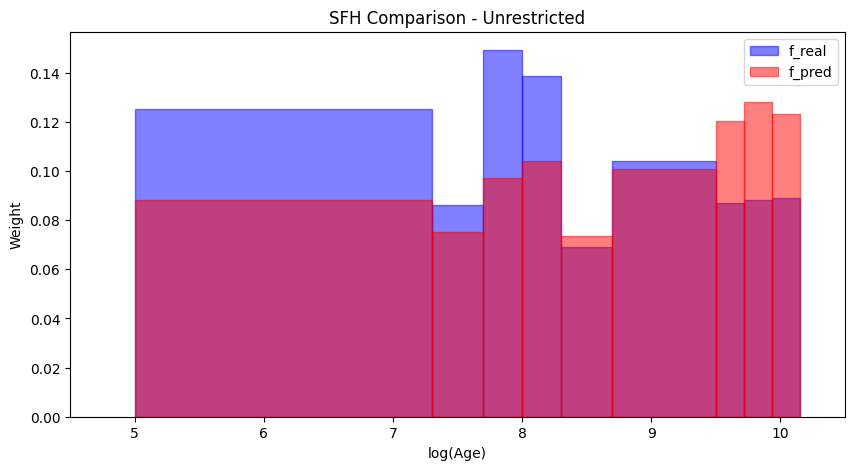

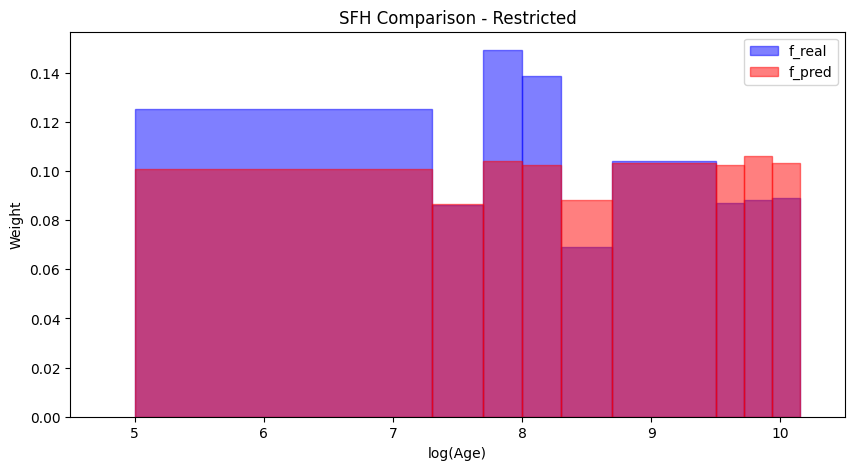

In [4]:
model_unrestricted.plot_sfh()
model_restricted.plot_sfh()

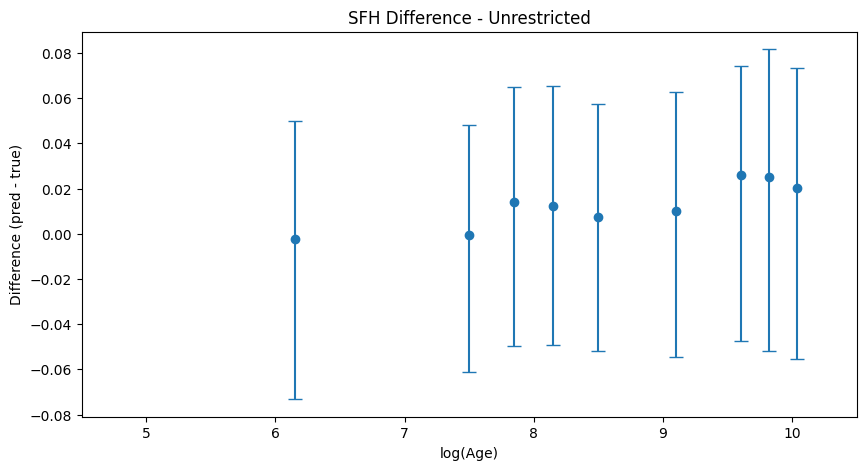

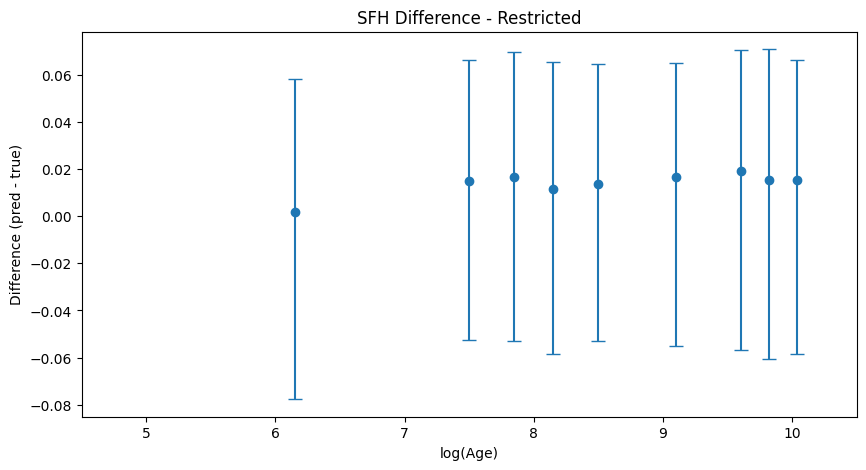

In [5]:
model_unrestricted.plot_difference()
model_restricted.plot_difference()

In [6]:
model_unrestricted.rmse()

(array([0.0623517 , 0.07461178, 0.07180176, 0.07674968, 0.07559631,
        0.07274435, 0.07336465, 0.07628414, 0.08643221, 0.08890166]),
 np.float64(0.07621212155675582))

In [7]:
model_restricted.rmse()

(array([0.07947195, 0.07819193, 0.0798283 , 0.08036707, 0.08413523,
        0.07946107, 0.07435173, 0.07796254, 0.08569213, 0.08666697]),
 np.float64(0.08069363805173538))